In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import train_test_split as TTS
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt

## Ridge岭回归

### 加利福尼亚数据集

In [2]:
housevalue = fch()

X = pd.DataFrame(housevalue.data)
y = housevalue.target
X.columns = ["住户收入中位数", "房屋使用年代中位数", "平均房间数目",
             "平均卧室数目", "街区人口", "平均入住率", "街区的纬度", "街区的经度"]

In [3]:
X.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [5]:
Xtrain, Xtest, Ytrain, Ytest = TTS(X, y, test_size=0.3, random_state=420)

In [6]:
for i in (Xtrain, Xtest):
    i.index = range(i.shape[0])

In [7]:
Xtrain.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,4.1776,35.0,4.425172,1.030683,5380.0,3.368817,37.48,-122.19
1,5.3261,38.0,6.267516,1.089172,429.0,2.732484,37.53,-122.30
2,1.9439,26.0,5.768977,1.141914,891.0,2.940594,36.02,-119.08
3,2.5000,22.0,4.916000,1.012000,733.0,2.932000,38.57,-121.31
4,3.8250,34.0,5.036765,1.098039,1134.0,2.779412,33.91,-118.35


In [8]:
# 使用岭回归来进行建模
reg = Ridge(alpha=1).fit(Xtrain, Ytrain)
reg.score(Xtest, Ytest)  # 加利佛尼亚房屋价值数据集中应该不是共线性问题

0.6043610352312281

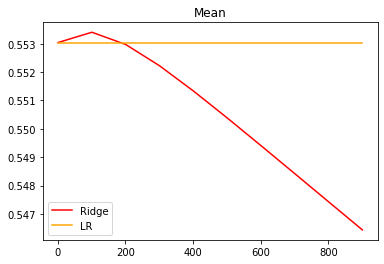

In [9]:
# 交叉验证下，与线性回归相比，岭回归的结果如何变化？
alpharange = np.arange(1, 1001, 100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    regs = cross_val_score(reg, X, y, cv=5, scoring='r2').mean()
    linears = cross_val_score(linear, X, y, cv=5, scoring='r2').mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange, ridge, color='red', label='Ridge')
plt.plot(alpharange, lr, color='orange', label='LR')
plt.title('Mean')
plt.legend()
plt.show()

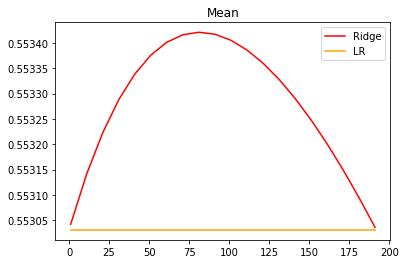

In [10]:
# 细化一下学习曲线
alpharange = np.arange(1, 201, 10)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    regs = cross_val_score(reg, X, y, cv=5, scoring='r2').mean()
    linears = cross_val_score(linear, X, y, cv=5, scoring='r2').mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange, ridge, color='red', label='Ridge')
plt.plot(alpharange, lr, color='orange', label='LR')
plt.title('Mean')
plt.legend()
plt.show()

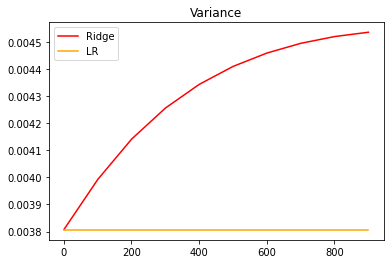

In [11]:
# 模型方差如何变化？
alpharange = np.arange(1, 1001, 100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    regs = cross_val_score(reg, X, y, cv=5, scoring='r2').var()
    linears = cross_val_score(linear, X, y, cv=5, scoring='r2').var()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange, ridge, color='red', label='Ridge')
plt.plot(alpharange, lr, color='orange', label='LR')
plt.title('Variance')
plt.legend()
plt.show()

### 波士顿房价数据集

In [12]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score

X = load_boston().data
y = load_boston().target

Xtrain, Xtest, Ytrain, Ytest = TTS(X, y, test_size=0.3, random_state=420)

In [13]:
X.shape

(506, 13)

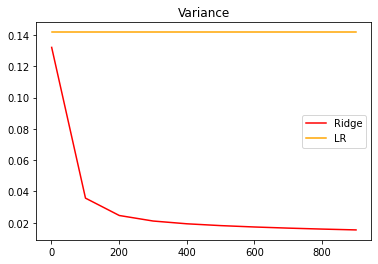

In [14]:
# 模型方差如何变化？
alpharange = np.arange(1, 1001, 100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    regs = cross_val_score(reg, X, y, cv=5, scoring='r2').var()
    linears = cross_val_score(linear, X, y, cv=5, scoring='r2').var()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange, ridge, color='red', label='Ridge')
plt.plot(alpharange, lr, color='orange', label='LR')
plt.title('Variance')
plt.legend()
plt.show()

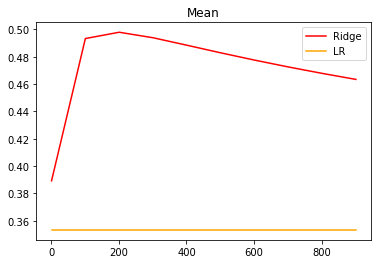

In [15]:
# 查看R2的变化
alpharange = np.arange(1, 1001, 100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    regs = cross_val_score(reg, X, y, cv=5, scoring='r2').mean()
    linears = cross_val_score(linear, X, y, cv=5, scoring='r2').mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange, ridge, color='red', label='Ridge')
plt.plot(alpharange, lr, color='orange', label='LR')
plt.title('Mean')
plt.legend()
plt.show()

## 使用交叉验证来选择最佳的正则化系数。

In [16]:
import numpy as np
import pandas as pd
from sklearn.linear_model import RidgeCV, LinearRegression
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt

housevalue = fch()

X = pd.DataFrame(housevalue.data)
y = housevalue.target
X.columns = ["住户收入中位数", "房屋使用年代中位数", "平均房间数目",
             "平均卧室数目", "街区人口", "平均入住率", "街区的纬度", "街区的经度"]

In [17]:
Ridge_ = RidgeCV(alphas=np.arange(1, 1001, 100),
                 # scoring="neg_mean_squared_error",
                 store_cv_values=True,
                 # cv=5,
                 ).fit(X, y)

In [18]:
# 无关交叉验证的岭回归结果
Ridge_.score(X, y)

0.6060251767338426

In [19]:
# 调用所有交叉验证的结果
Ridge_.cv_values_

array([[0.1557472 , 0.16301246, 0.16892723, ..., 0.18881663, 0.19182353,
        0.19466385],
       [0.15334566, 0.13922075, 0.12849014, ..., 0.09744906, 0.09344092,
        0.08981868],
       [0.02429857, 0.03043271, 0.03543001, ..., 0.04971514, 0.05126165,
        0.05253834],
       ...,
       [0.56545783, 0.5454654 , 0.52655917, ..., 0.44532597, 0.43130136,
        0.41790336],
       [0.27883123, 0.2692305 , 0.25944481, ..., 0.21328675, 0.20497018,
        0.19698274],
       [0.14313527, 0.13967826, 0.13511341, ..., 0.1078647 , 0.10251737,
        0.0973334 ]])

In [21]:
Ridge_.cv_values_.shape

(20640, 10)

In [20]:
# 进行平均后可以查看每个正则化系数取值下的交叉验证结果
Ridge_.cv_values_.mean(axis=0)

array([0.52823795, 0.52787439, 0.52807763, 0.52855759, 0.52917958,
       0.52987689, 0.53061486, 0.53137481, 0.53214638, 0.53292369])

In [22]:
# 查看被选择出来的最佳正则化系数
Ridge_.alpha_

101